
# Gapminder World (Building  a mchine learning model to pedict life expectancy)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Gapminder has collected a lot of information about how people live heir lives in different countries, racked across the years, and on a umber of different indicators. For this project I selected child mortality, income, life expectancy, and population indicators.  
>
>I am going to clean and merge these indicators into one DataFrame then build a mahine learning model to predict life expectancy.

<a id='wrangling'></a>
## Data Wrangling

### Asessing and cleaning Data

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

# Loading data and printing out a few lines. 
df1 = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df2 = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted (1).csv')
df3 = pd.read_csv('life_expectancy_years (1).csv')
df4 = pd.read_csv('population_total.csv')

In [2]:
# Transposing year rows and renaming the value columns 
data_files = [df1, df2, df3, df4]
names = ['child_mortality','income','life_expectancy','population']
i = 0 
names = ['child_mortality','income','life_expectancy','population']
for df in data_files: 
    df = df.melt(['country'], var_name='year')
    df = df.rename(columns = {'value': names[i]}, inplace = False)
    data_files[i] = df
    i += 1
df1, df2, df3, df4 = data_files

In [3]:
df1.head() # Checking

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Albania,1800,375.0
2,Algeria,1800,460.0
3,Andorra,1800,NaN
4,Angola,1800,486.0


In [4]:
# Merging data files in one data file
dfm1= pd.merge(df1,df2,on=['year', 'country'], how= 'left')
dfm2 = pd.merge(dfm1,df3,on=['year', 'country'], how= 'left')
df = pd.merge(dfm2,df4,on=['year', 'country'], how= 'left')

In [5]:
df.head() #checking

,country,year,child_mortality,income,life_expectancy,population
0,Afghanistan,1800,469.0,603.0,28.2,3280000
1,Albania,1800,375.0,667.0,35.4,400000
2,Algeria,1800,460.0,715.0,28.8,2500000
3,Andorra,1800,NaN,1200.0,NaN,2650
4,Angola,1800,486.0,618.0,27.0,1570000


In [6]:
# Getting the dataset information  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          58695 non-null  object 
 1   year             58695 non-null  object 
 2   child_mortality  57045 non-null  float64
 3   income           46513 non-null  float64
 4   life_expectancy  55528 non-null  float64
 5   population       58695 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


Data has 58695  rows and 4 columns, child mortality represnets dead childs below age 5 per 1.000 births so it should be converted into intg. 

In [7]:
# Checking for null values and duplicates
df.isnull().sum()

country                0
year                   0
child_mortality     1650
income             12182
life_expectancy     3167
population             0
dtype: int64

Data has alot of null values that shouldn't be dropped because number of countries will be decreased from 195 to 187! It is better to fill nun values with zeros.

In [8]:
# Dealing with null values 
df = df.fillna(df.mean())

In [9]:
# Checking
df.isnull().sum()

country            0
year               0
child_mortality    0
income             0
life_expectancy    0
population         0
dtype: int64

In [10]:
# Changing the type of the child mortality column data into intg
df.child_mortality=df.child_mortality.astype(int)

In [11]:
# Checking 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          58695 non-null  object 
 1   year             58695 non-null  object 
 2   child_mortality  58695 non-null  int32  
 3   income           58695 non-null  float64
 4   life_expectancy  58695 non-null  float64
 5   population       58695 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 2.9+ MB


In [12]:
# Checking for duplicate rows
df.duplicated().sum()

0

It is clear that data has no toataly duplicate rows

In [13]:
# Getting some statistical info
df.describe()

,child_mortality,income,life_expectancy,population
count,58695.000000,58695.000000,58695.000000,5.869500e+04
mean,209.415436,6428.630340,53.036046,2.328525e+07
std,182.800302,11886.813967,21.074137,1.007173e+08
min,0.000000,245.000000,1.010000,6.450000e+02
25%,17.000000,1050.000000,32.600000,4.220000e+05
50%,200.000000,2730.000000,53.036046,2.610000e+06
75%,400.500000,6428.630340,73.500000,1.080000e+07
max,756.000000,179000.000000,94.800000,1.650000e+09


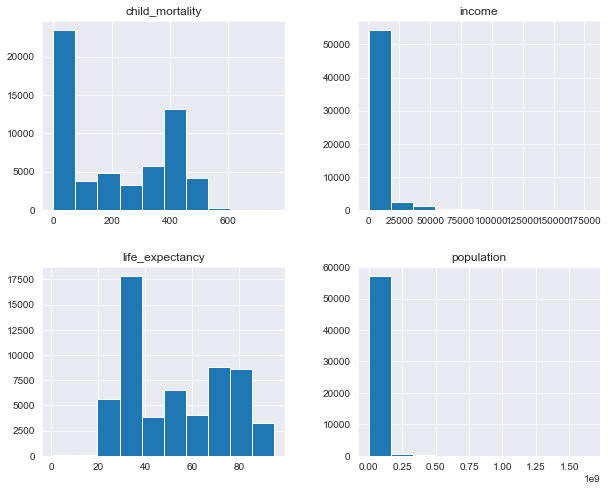

In [14]:
# Visulizing data 
df.hist(figsize= (10,8));

There is no outliers 

In [15]:
# Correlation 
df.corr()

,child_mortality,income,life_expectancy,population
child_mortality,1.000000,-0.436589,-0.942181,-0.149972
income,-0.436589,1.000000,0.434868,0.037429
life_expectancy,-0.942181,0.434868,1.000000,0.167494
population,-0.149972,0.037429,0.167494,1.000000


It seems that there is a correlation between income/life expectancy and child mortality (inverse relation).

# Building a machine learning model to predict life expectancy 

In [16]:
# define features and target 
y = df['life_expectancy']
X = df[['child_mortality', 'income', 'population']]

# Import Regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

#import pipline 
from sklearn.pipeline import make_pipeline

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Import train_test_split
from sklearn.model_selection import train_test_split
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
random_state=3)

In [17]:
# Instantiate regressors 
dt = DecisionTreeRegressor()
reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
rf = RandomForestRegressor()

Regressors = [('Linear Regression', reg),
('Decision Tree', dt),
('Ridge', ridge),
('Lasso', lasso), 
('Elastic',elastic),
('Random Forest',rf)]

In [20]:
for reg_name, reg in Regressors:
    #fit reg to the training set
    reg.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = reg.predict(X_test)
    # Evaluate the test-set RMSE of reg on the test set
    print('{:s} : {:.3f}'.format(reg_name, MSE(y_test, y_pred)**.5))

Linear Regression : 6.922
Decision Tree : 3.408
Ridge : 6.922
Lasso : 6.922
Elastic : 6.922
Random Forest : 2.497


## Building a tuned Decision Tree model to predict life expectancy 

In [23]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 3),
              "min_samples_leaf": np.arange(1, 9)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor(random_state= 3)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Instantiate the pipline
pl = make_pipeline(tree_cv)
# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

3.1038738979845633


## Building a VotingRegressor model to predict life expectancy 

In [22]:
#import the voting regressor 
from sklearn.ensemble import VotingRegressor
vc = VotingRegressor(estimators=Regressors)

#instantiate a pipeline 
pl = make_pipeline(vc)

# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

4.969262401479132


## Building a RandomForestRegressor model to predict life expectancy 

In [27]:
# Instantiate a random forests regressor 'rf' 
rf = RandomForestRegressor(random_state= 3)

# Instantiate a pipeline 
pl = make_pipeline(rf)
# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

2.5078964685897756


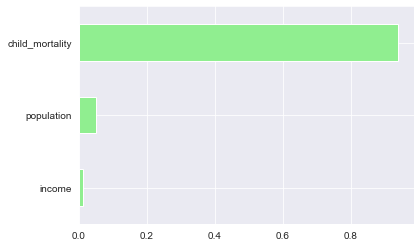

In [131]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

## Building a BaggingRegressor model to predict life expectancy 

In [72]:
# Imort the BaggingRegressor
from sklearn.ensemble import BaggingRegressor
# Instantiate a Regrssion-tree 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.16, random_state=3)
# Instantiate a BaggingRegressor 'br'
br = BaggingRegressor(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Instantiate a pipeline 
pl = make_pipeline(br)

# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

## AdaBoost and GradientBoosting Regressors

In [128]:
from sklearn.ensemble import  AdaBoostRegressor
dt = DecisionTreeRegressor(max_depth=1, random_state=3)
adb_reg = AdaBoostRegressor(base_estimator=dt, n_estimators=100)

pl = make_pipeline(adb_reg)

# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

9.045225987049681


In [129]:
from sklearn.ensemble import  GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=3)

pl = make_pipeline(gbr)

# Fit 'pl' to the training-set
pl.fit(X_train, y_train)
# Predict test-set labels
y_pred = pl.predict(X_test)
# Compute test-set RMSE
rmse_pl = MSE(y_test, y_pred)**.5
print(rmse_pl)

4.61178115456449


# Conclusions 

### After training more than a regression model, random forest had the lowest rmse, and child_mortality is the feature that has the mose effect on life expectancy. It is recommended use that  model in predictions.